In [1]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in /anaconda3/lib/python3.7/site-packages (0.9.0)
You are using pip version 19.0.2, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!ls -l

total 2480
-rw-r--r--  1 samirgadkari  staff     209 Mar 11 13:27 Pipfile
-rw-r--r--  1 samirgadkari  staff   14648 Mar 11 13:27 Pipfile.lock
-rw-r--r--@ 1 samirgadkari  staff   44028 Mar 11 10:25 Pokemon.csv
-rw-r--r--@ 1 samirgadkari  staff   44026 Mar 11 10:26 Pokemon_cleaned.csv
-rwxr-xr-x  1 samirgadkari  staff     978 Mar 11 10:25 mongodb_get.py
-rw-r--r--  1 samirgadkari  staff  164561 Mar 11 22:12 pokemon.ipynb
-rw-r--r--  1 samirgadkari  staff    2343 Mar 11 21:56 pokemon_api_get.py
-rw-r--r--  1 samirgadkari  staff  981179 Mar 11 22:09 pokemon_moves.csv


In [4]:
df = pd.read_csv('./Pokemon.csv')
df.shape

(800, 13)

In [5]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### MongoDB thinks a period implies a sublevel. 'Sp. Atk' and 'Sp. Def' are converted into {'Sp': {'Atk', 'Def'}}. So remove the period.

In [6]:
df = df.rename(columns={'Sp. Atk': 'Sp Atk', 'Sp. Def': 'Sp Def'})

In [7]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [8]:
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp Atk         int64
Sp Def         int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [9]:
df.Name = df.Name.str.strip()
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [10]:
df['Type 1'] = df['Type 1'].str.strip()
df['Type 2'] = df['Type 2'].str.strip()
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [11]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp Atk          0
Sp Def          0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [12]:
df = df.fillna('')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,,309,39,52,43,60,50,65,1,False


In [13]:
df.to_csv('./Pokemon_cleaned.csv', index=False)

In [14]:
df.Generation.value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

In [15]:
pokemon_type_counts = df.groupby(['Type 1', 'Type 2']).Name.count()
pokemon_type_counts = pokemon_type_counts.unstack().fillna(0)
pokemon_type_counts

Type 2,,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Type 1,,,,,,,,,,,,,,,,,,,
Bug,17.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,14.0,1.0,6.0,2.0,0.0,0.0,12.0,0.0,3.0,7.0,1.0
Dark,10.0,0.0,0.0,3.0,0.0,0.0,2.0,3.0,5.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0
Dragon,11.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,6.0,0.0,0.0,5.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0
Electric,27.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,5.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,1.0
Fairy,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fighting,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0
Fire,28.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0,6.0,0.0,0.0,3.0,0.0,2.0,0.0,2.0,1.0,1.0,1.0
Flying,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ghost,10.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,2.0,0.0,10.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0


In [16]:
pokemon_type_counts

Type 2,,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Type 1,,,,,,,,,,,,,,,,,,,
Bug,17.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,14.0,1.0,6.0,2.0,0.0,0.0,12.0,0.0,3.0,7.0,1.0
Dark,10.0,0.0,0.0,3.0,0.0,0.0,2.0,3.0,5.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0
Dragon,11.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,6.0,0.0,0.0,5.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0
Electric,27.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,5.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,1.0
Fairy,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fighting,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0
Fire,28.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0,6.0,0.0,0.0,3.0,0.0,2.0,0.0,2.0,1.0,1.0,1.0
Flying,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ghost,10.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,2.0,0.0,10.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0


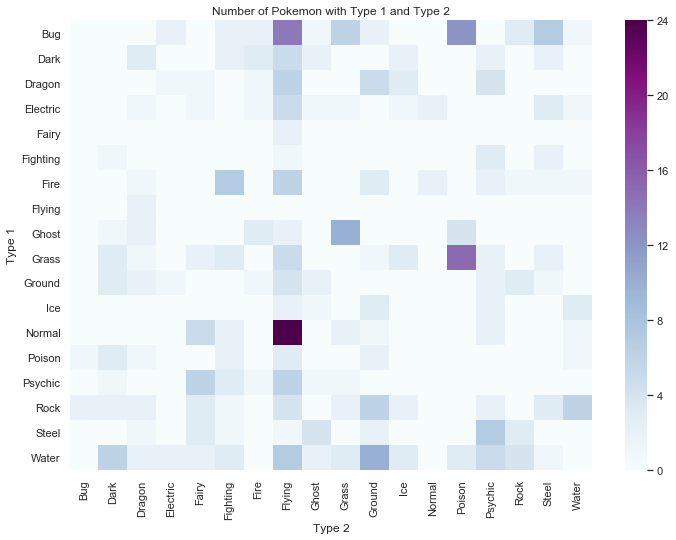

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(pd.DataFrame(pokemon_type_counts).iloc[:,1:], cmap='BuPu');
plt.title('Number of Pokemon with Type 1 and Type 2');

In [18]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [19]:
moves = pd.read_csv('./Pokemon_moves.csv', header=0)

In [20]:
moves.head()

,Name,Move,Move_points
0,Bulbasaur,razor-wind,80.0
1,Bulbasaur,swords-dance,NaN
2,Bulbasaur,cut,50.0
3,Bulbasaur,bind,15.0
4,Bulbasaur,vine-whip,45.0


In [21]:
moves = moves.groupby('Name').agg(sum)

In [22]:
moves.head()

,Move_points
Name,
Abomasnow,3005.0
Abra,2960.0
Absol,4770.0
Accelgor,1775.0
Aerodactyl,3860.0


In [23]:
df = df.set_index('Name')
df.head()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,,309,39,52,43,60,50,65,1,False


In [26]:
df_all = df.merge(moves, left_on='Name', right_on='Name')
df_all.head()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Generation,Legendary,Move_points
Name,,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False,2555.0
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False,1850.0
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False,2880.0
Charmander,4,Fire,,309,39,52,43,60,50,65,1,False,4305.0
Charmeleon,5,Fire,,405,58,64,58,80,65,80,1,False,3825.0


In [30]:
df_all = df_all.reset_index()
df_all.head()

,Name,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Generation,Legendary,Move_points
0,Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False,2555.0
1,Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False,1850.0
2,Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False,2880.0
3,Charmander,4,Fire,,309,39,52,43,60,50,65,1,False,4305.0
4,Charmeleon,5,Fire,,405,58,64,58,80,65,80,1,False,3825.0


In [31]:
df_all.to_csv('./pokemon_all.csv', index=False)

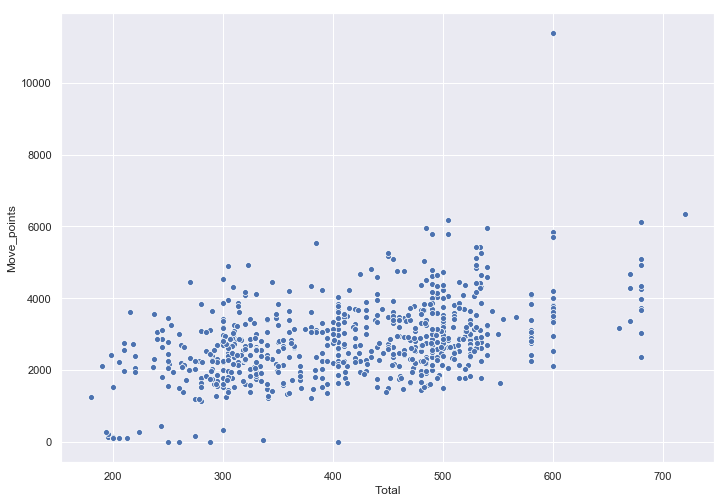

In [33]:
sns.scatterplot(data=df_all, x='Total', y='Move_points');